## <b>Exercices partie 2 : Classifieurs par algorithmes de Machine Learning</b>

L'objectif ici est d'appliquer différents classifieurs sur un même dataset.  
On utilisera pour cela le dataset MNIST.  
Cela permettra de comparer les performances de ces différents classifieurs.  
  
Pour chacun des algorithmes, il s'agit de rechercher la <b>meilleure précision</b> en jouant sur son paramétrage, et de calculer les temps de traitement :
- <b>durée d'adaptation</b> du classifieur (fonction "fit")
- <b>durée de la prédiction</b> (=inférence) sur l'ensemble de test (fonction "predict")  

NB :
- connaissant la taille de l'ensemble de test de MNIST (10000 images par défaut), le temps de la prédiction sur cet ensemble donne une bonne idée du temps de traitement d'une seule image (pour l'utilisation en mode réel).
- en fonction du classifieur utilisé, il faudra peut-être parfois n'utiliser qu'une partie du dataset, si le temps de traitement est trop long (mais cela risque de réduire sa précision).

Une fois tous les algorithmes testé sur les données MNIST, un tableau récapitulatif devra donner un <b>aperçu global de leur performance</b>, à la fois en termes de précision que de durée de l'inférence.

### <b>Exercice 2.1 : Régression logistique</b>

Appliquer la regression logistique aux données MNIST et indiquer la précision (accuracy) obtenue.  
Préciser quelles sont les classes les plus confondues.

Adaptation du modèle...
Durée adaptation : 9.29 secondes
Prédiction sur l'ensemble de test...
Durée prédiction : 0.00 secondes
Précision (accuracy) : 0.95

Matrice de confusion :


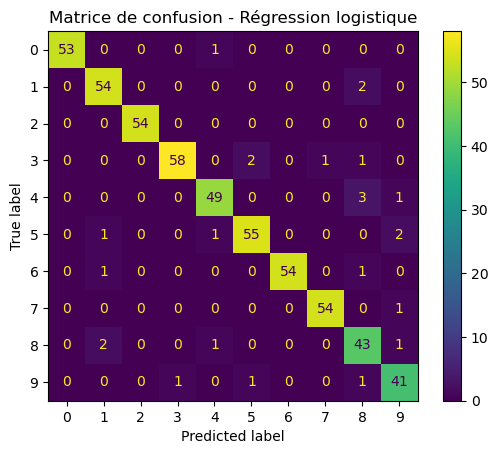

In [1]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import time
import matplotlib.pyplot as plt

# Chargement des données MNIST
digits = datasets.load_digits()

# Séparation des features et des labels
X = digits.data
y = digits.target

# Division des données en ensemble d'entraînement et de test (30%)
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)

# Création du modèle de régression logistique
model = LogisticRegression(max_iter=10000)

# Mesure du temps d'adaptation (fit)
print("Adaptation du modèle...")
t0 = time.time()
model.fit(trainX, trainy)
fit_time = time.time() - t0
print(f"Durée adaptation : {fit_time:.2f} secondes")

# Prédiction des résultats sur l'ensemble de test
print("Prédiction sur l'ensemble de test...")
t0 = time.time()
y_pred = model.predict(testX)
predict_time = time.time() - t0
print(f"Durée prédiction : {predict_time:.2f} secondes")

# Calcul de la précision
accuracy = accuracy_score(testy, y_pred)
print(f"Précision (accuracy) : {accuracy:.2f}")

# Affichage de la matrice de confusion
cm = confusion_matrix(testy, y_pred)
print("\nMatrice de confusion :")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title("Matrice de confusion - Régression logistique")
plt.show()

##### <b>Commentaires :</b>

Les classes les plus confondues sont 4 et 8, avec 3 erreurs où le modèle a confondu le chiffre 4 avec le 8, comme le montre la matrice de confusion.

### <b>Exercice 2.2 : KPPV</b>

Déterminer la valeur de K permettant d'obtenir la meilleure précision (accuracy) avec les données MNIST.

Chargement des datasets MNIST...
Chargement terminé.
Dimensions des données d'entraînement (features) : (59999, 784)
Dimensions des données d'entraînement (labels) : (59999,)
Dimensions des données de test (features) : (9999, 784)
Dimensions des données de test (labels) : (9999,)

Test avec K = 1...
Adaptation du classifieur, patience...
Durée adaptation classifieur : 0.00 secondes.
Calcul de la précision, patience...
Durée prédiction : 0.4 secondes.
Précision : 86.9%

Test avec K = 2...
Adaptation du classifieur, patience...
Durée adaptation classifieur : 0.00 secondes.
Calcul de la précision, patience...
Durée prédiction : 0.6 secondes.
Précision : 85.0%

Test avec K = 3...
Adaptation du classifieur, patience...
Durée adaptation classifieur : 0.00 secondes.
Calcul de la précision, patience...
Durée prédiction : 0.7 secondes.
Précision : 86.2%

Test avec K = 4...
Adaptation du classifieur, patience...
Durée adaptation classifieur : 0.00 secondes.
Calcul de la précision, patience...
Du

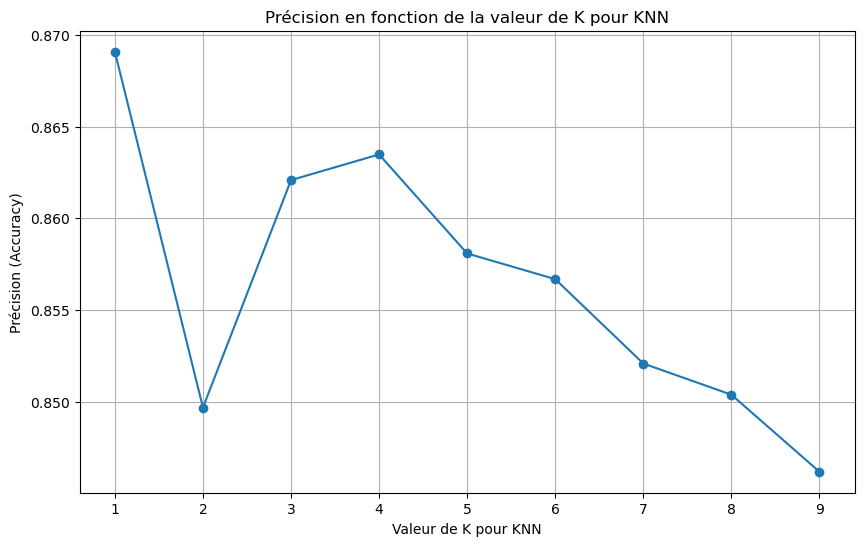

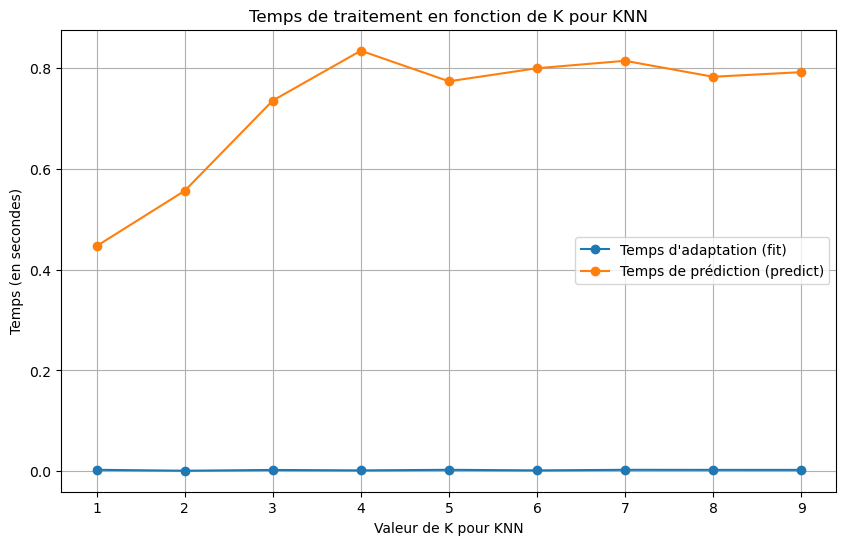

In [2]:
from sklearn import datasets
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

# Chargement des datasets MNIST
print("Chargement des datasets MNIST...")
train = pd.read_csv('/home/jovyan/iadatasets/MNIST/mnist_train.csv')
test = pd.read_csv('/home/jovyan/iadatasets/MNIST/mnist_test.csv')
print("Chargement terminé.")

# Séparation des données en features (X) et labels (y)
trainX = train.values[:, 1:]  # Features des données d'entraînement
trainy = train.values[:, 0]   # Labels des données d'entraînement
testX = test.values[:, 1:]    # Features des données de test
testy = test.values[:, 0]     # Labels des données de test

# Affichage des dimensions des datasets
print("Dimensions des données d'entraînement (features) :", trainX.shape)
print("Dimensions des données d'entraînement (labels) :", trainy.shape)
print("Dimensions des données de test (features) :", testX.shape)
print("Dimensions des données de test (labels) :", testy.shape)

# Plage de valeurs pour K (de 1 à 10)
k_range = range(1, 10)
scores = []  # Liste pour stocker les précisions
fit_times = []  # Liste pour stocker les temps d'adaptation (fit)
predict_times = []  # Liste pour stocker les temps de prédiction

# Recherche du meilleur K
for k in k_range:
    print(f"\nTest avec K = {k}...")
    
    # Création et entraînement du classifieur KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Mesure du temps d'adaptation
    print("Adaptation du classifieur, patience...")
    t0 = time.time()
    knn.fit(trainX[0:1000], trainy[0:1000])  # Utilisation de 1000 exemples
    fit_time = time.time() - t0
    fit_times.append(fit_time)
    print(f"Durée adaptation classifieur : {fit_time:.2f} secondes.")
    
    # Mesure du temps de prédiction
    print("Calcul de la précision, patience...")
    t0 = time.time()
    y_pred = knn.predict(testX)  # Prédiction sur tout l'ensemble de test
    predict_time = time.time() - t0
    predict_times.append(predict_time)
    print(f"Durée prédiction : {predict_time:.1f} secondes.")
    
    # Calcul de la précision
    score = metrics.accuracy_score(testy, y_pred)
    scores.append(score)
    print(f"Précision : {score * 100:.1f}%")

# Affichage de la meilleure précision
best_k = k_range[np.argmax(scores)]
best_accuracy = max(scores)
print(f"\nLa meilleure précision est obtenue pour K = {best_k} avec une précision de {best_accuracy * 100:.2f}%")

# Tracer de la précision en fonction de K
plt.figure(figsize=(10, 6))
plt.plot(k_range, scores, marker='o')
plt.title('Précision en fonction de la valeur de K pour KNN')
plt.xlabel('Valeur de K pour KNN')
plt.ylabel('Précision (Accuracy)')
plt.grid(True)
plt.show()

# Tracer du temps d'adaptation et de la prédiction en fonction de K
plt.figure(figsize=(10, 6))
plt.plot(k_range, fit_times, marker='o', label='Temps d\'adaptation (fit)')
plt.plot(k_range, predict_times, marker='o', label='Temps de prédiction (predict)')
plt.title('Temps de traitement en fonction de K pour KNN')
plt.xlabel('Valeur de K pour KNN')
plt.ylabel('Temps (en secondes)')
plt.legend()
plt.grid(True)
plt.show()

##### <b>Commentaires :</b>



La meilleure précision sur le dataset MNIST est atteinte avec K=1, soit environ 86,9%. Au-delà de cette valeur, la précision diminue progressivement, comme le montre le premier graphique. En parallèle, le temps de prédiction augmente avec la valeur de K, comme on peut le voir dans le second graphique.

### <b>Exercice 2.3 : Adaboost</b>

Appliquer le classifieur Adaboost sur les données MNIST, avec les paramètres par défaut.
Puis essayer de déterminer d'autres valeurs de paramètres permettant d'améliorer la précision (accuracy).
Commenter les résultats, notamment en indiquant quels sont les meilleurs résultats obtenus.
Si le temps de traitement est trop long, on pourra limiter le nombre d'exemples pris pour chaque classe.

Chargement des datasets MNIST...
Chargement terminé.
Dimensions des données d'entraînement (features) : (59999, 784)
Dimensions des données d'entraînement (labels) : (59999,)
Dimensions des données de test (features) : (9999, 784)
Dimensions des données de test (labels) : (9999,)

Application d'AdaBoost avec les paramètres par défaut...
Durée d'adaptation (fit) : 1.19s
Durée de prédiction : 0.39s
Précision obtenue avec les paramètres par défaut : 51.23%

Test d'autres valeurs de paramètres...

Test avec n_estimators = 50...
Durée d'adaptation : 1.20s
Durée de prédiction : 0.39s
Précision : 51.23%

Test avec n_estimators = 100...
Durée d'adaptation : 2.38s
Durée de prédiction : 0.77s
Précision : 54.73%

Test avec n_estimators = 200...
Durée d'adaptation : 4.77s
Durée de prédiction : 1.54s
Précision : 51.72%

La meilleure précision est obtenue avec n_estimators = 100, précision = 54.73%


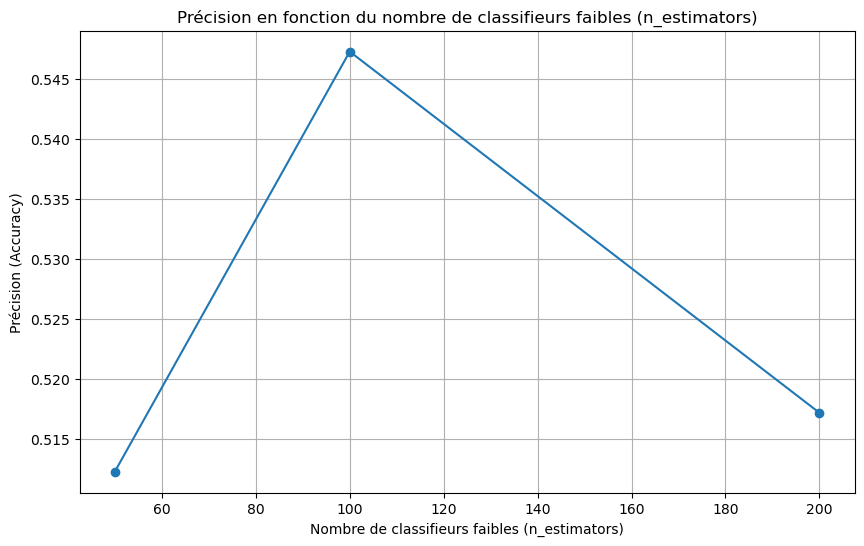

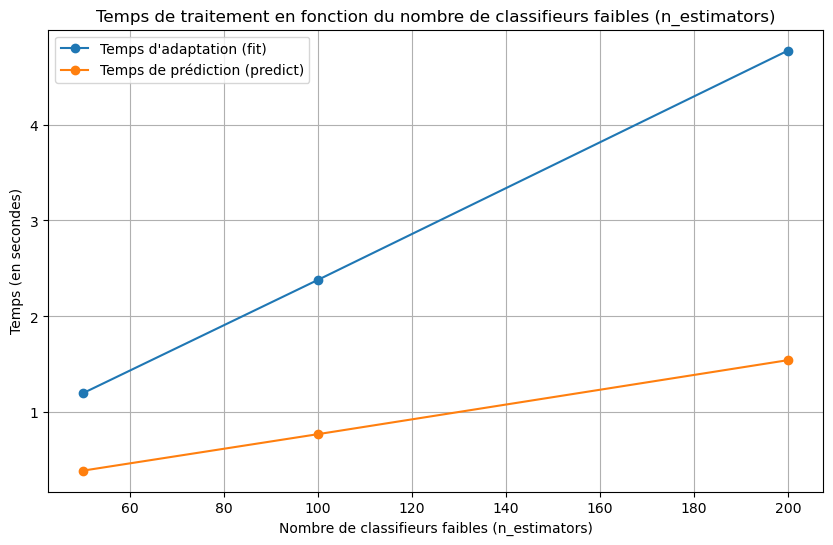

In [3]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np

# Chargement des datasets MNIST
print("Chargement des datasets MNIST...")
train = pd.read_csv('/home/jovyan/iadatasets/MNIST/mnist_train.csv')
test = pd.read_csv('/home/jovyan/iadatasets/MNIST/mnist_test.csv')
print("Chargement terminé.")

# Séparation des données en features (X) et labels (y)
trainX = train.values[:, 1:]  # Features des données d'entraînement
trainy = train.values[:, 0]   # Labels des données d'entraînement
testX = test.values[:, 1:]    # Features des données de test
testy = test.values[:, 0]     # Labels des données de test

# Affichage des dimensions des datasets
print("Dimensions des données d'entraînement (features) :", trainX.shape)
print("Dimensions des données d'entraînement (labels) :", trainy.shape)
print("Dimensions des données de test (features) :", testX.shape)
print("Dimensions des données de test (labels) :", testy.shape)

# Utilisation d'AdaBoost avec les paramètres par défaut
print("\nApplication d'AdaBoost avec les paramètres par défaut...")
t0 = time.time()

ada_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,  # 50 classifieurs faibles par défaut
    random_state=42
)

# Entraînement du modèle sur un sous-ensemble de 2000 exemples pour éviter un temps de traitement trop long
ada_clf.fit(trainX[:2000], trainy[:2000])
print("Durée d'adaptation (fit) : {:.2f}s" .format(time.time() - t0))

# Prédiction sur l'ensemble de test
t0 = time.time()
y_pred = ada_clf.predict(testX)
print("Durée de prédiction : {:.2f}s" .format(time.time() - t0))

# Calcul de la précision
accuracy = accuracy_score(testy, y_pred)
print(f"Précision obtenue avec les paramètres par défaut : {accuracy * 100:.2f}%")

# Test avec des valeurs différentes de paramètres pour améliorer la précision
# Modification du nombre de classifieurs faibles (n_estimators)
print("\nTest d'autres valeurs de paramètres...")
n_estimators_range = [50, 100, 200]
accuracies = []
fit_times = []
predict_times = []

for n_estimators in n_estimators_range:
    print(f"\nTest avec n_estimators = {n_estimators}...")
    
    # Initialisation du classifieur avec un nombre différent de classifieurs faibles
    ada_clf = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=n_estimators,
        random_state=42
    )
    
    # Entraînement du modèle
    t0 = time.time()
    ada_clf.fit(trainX[:2000], trainy[:2000])
    fit_time = time.time() - t0
    fit_times.append(fit_time)
    print(f"Durée d'adaptation : {fit_time:.2f}s")
    
    # Prédiction
    t0 = time.time()
    y_pred = ada_clf.predict(testX)
    predict_time = time.time() - t0
    predict_times.append(predict_time)
    print(f"Durée de prédiction : {predict_time:.2f}s")
    
    # Calcul de la précision
    accuracy = accuracy_score(testy, y_pred)
    accuracies.append(accuracy)
    print(f"Précision : {accuracy * 100:.2f}%")

# Affichage des résultats
best_n_estimators = n_estimators_range[np.argmax(accuracies)]
best_accuracy = max(accuracies)
print(f"\nLa meilleure précision est obtenue avec n_estimators = {best_n_estimators}, précision = {best_accuracy * 100:.2f}%")

# Tracer la précision en fonction de n_estimators
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, accuracies, marker='o')
plt.title('Précision en fonction du nombre de classifieurs faibles (n_estimators)')
plt.xlabel('Nombre de classifieurs faibles (n_estimators)')
plt.ylabel('Précision (Accuracy)')
plt.grid(True)
plt.show()

# Tracer les temps d'adaptation et de prédiction
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, fit_times, marker='o', label='Temps d\'adaptation (fit)')
plt.plot(n_estimators_range, predict_times, marker='o', label='Temps de prédiction (predict)')
plt.title('Temps de traitement en fonction du nombre de classifieurs faibles (n_estimators)')
plt.xlabel('Nombre de classifieurs faibles (n_estimators)')
plt.ylabel('Temps (en secondes)')
plt.legend()
plt.grid(True)
plt.show()


##### <b>Commentaires :</b>

on voit que la meilleure précision atteinte est de 54.73% avec 100 estimateurs, ce qui est une légère amélioration par rapport aux 51.23% de départ. 

### <b>Exercice 2.4 : Arbres de décision</b>

Appliquer l'algorithme arbre de décision de Scikit-Learn aux données MNIST, en testant quelques valeurs différentes pour la profondeur de l'arbre (et en mettant en évidence le phénomène d'apprentissage par coeur).  

Chargement des datasets MNIST...
Chargement terminé.


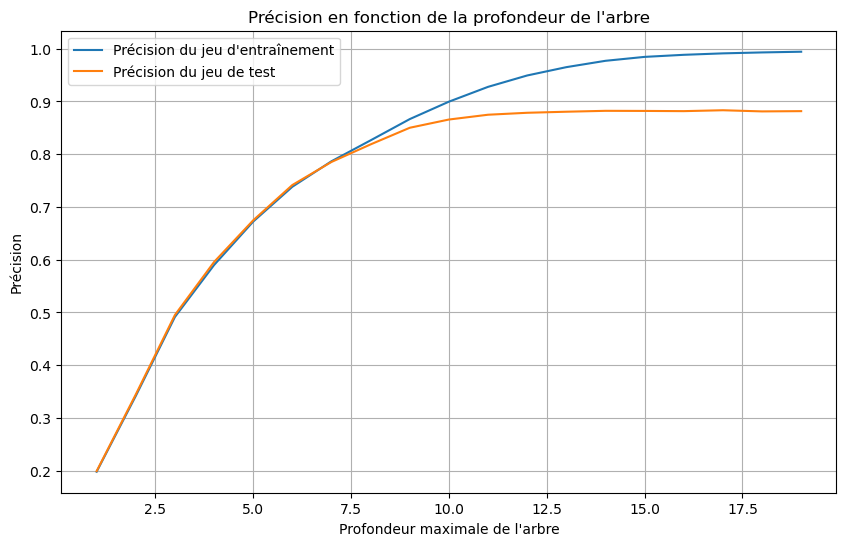


Visualisation de l'arbre de décision pour max_depth = 19


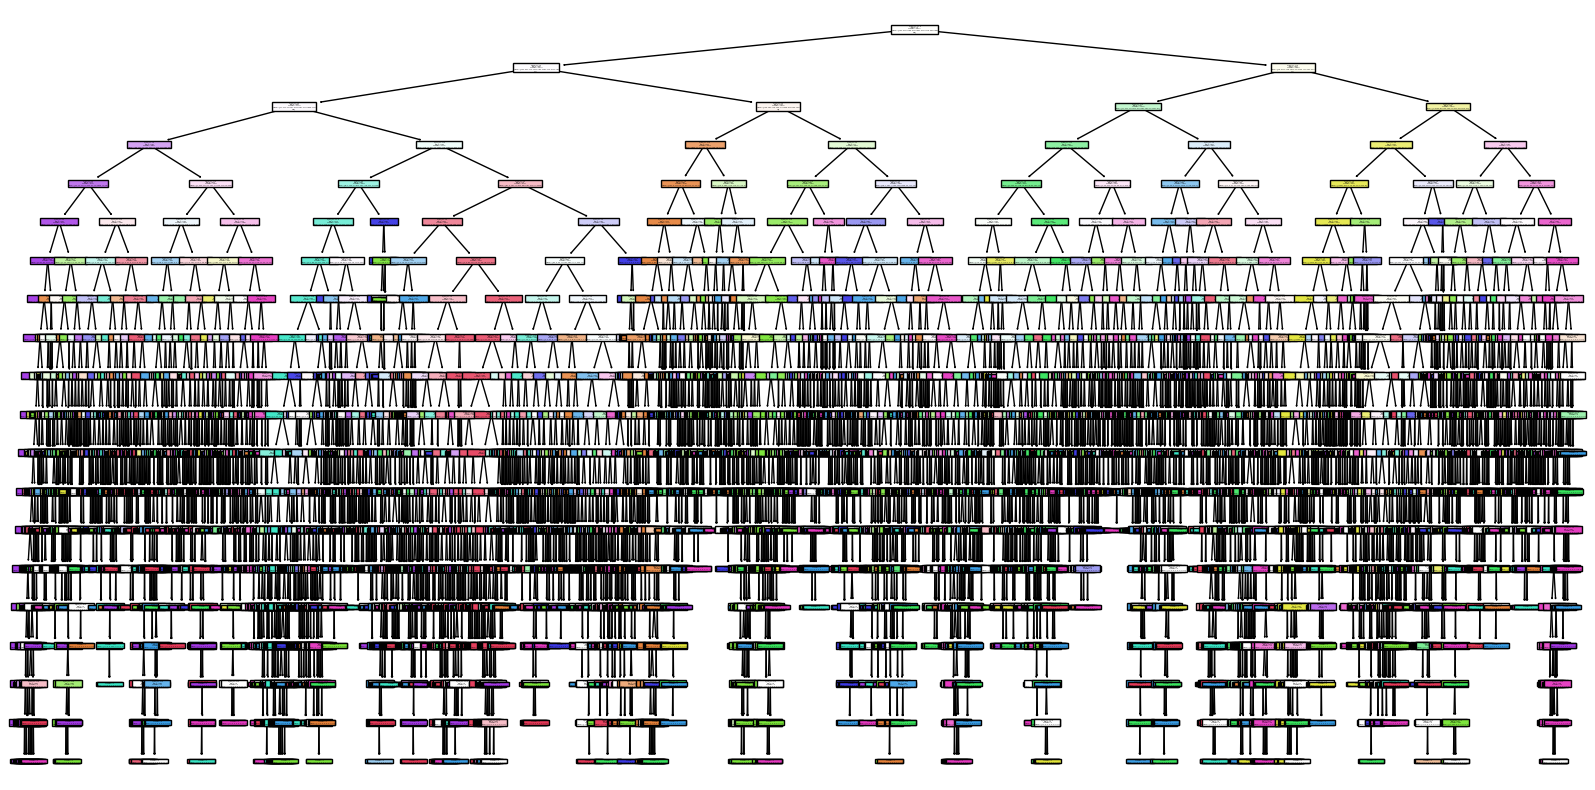

La meilleure précision sur le jeu de test (88.33%) est obtenue avec une profondeur d'arbre de 17.
Le phénomène d'apprentissage par cœur est visible lorsque la précision sur le jeu d'entraînement continue d'augmenter jusqu'à 99.42%, mais que celle du jeu de test commence à diminuer.


In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd

# Chargement des datasets MNIST
print("Chargement des datasets MNIST...")
train = pd.read_csv('/home/jovyan/iadatasets/MNIST/mnist_train.csv')
test = pd.read_csv('/home/jovyan/iadatasets/MNIST/mnist_test.csv')
print("Chargement terminé.")

# Séparation des données en features (X) et labels (y)
X_train = train.values[:, 1:]  # Features des données d'entraînement
y_train = train.values[:, 0]   # Labels des données d'entraînement
X_test = test.values[:, 1:]    # Features des données de test
y_test = test.values[:, 0]     # Labels des données de test

# Listes pour stocker les précisions sur le jeu d'entraînement et de test
training_accuracies = []
test_accuracies = []

# Gamme des profondeurs d'arbres à tester
max_depth_range = range(1, 20)

# Boucle pour tester plusieurs valeurs de profondeur de l'arbre
for md in max_depth_range:
    # Initialisation du classifieur avec une profondeur d'arbre max différente
    model = DecisionTreeClassifier(max_depth=md, random_state=0)
    
    # Entraînement du modèle
    model.fit(X_train, y_train)
    
    # Précision sur le jeu d'entraînement
    training_accuracy = model.score(X_train, y_train)
    
    # Précision sur le jeu de test
    test_accuracy = model.score(X_test, y_test)
    
    # Stockage des précisions
    training_accuracies.append(training_accuracy)
    test_accuracies.append(test_accuracy)

# Tracé des courbes de précision pour l'entraînement et le test
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, training_accuracies, label='Précision du jeu d\'entraînement')
plt.plot(max_depth_range, test_accuracies, label='Précision du jeu de test')
plt.ylabel('Précision')
plt.xlabel('Profondeur maximale de l\'arbre')
plt.legend()
plt.title('Précision en fonction de la profondeur de l\'arbre')
plt.grid(True)
plt.show()

# Visualisation de l'arbre de décision à la profondeur maximale testée
print("\nVisualisation de l'arbre de décision pour max_depth =", max_depth_range[-1])
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True)
plt.show()

# Conclusion sur l'apprentissage par cœur
max_train_accuracy = max(training_accuracies)
max_test_accuracy = max(test_accuracies)
best_depth = max_depth_range[test_accuracies.index(max_test_accuracy)]

print(f"La meilleure précision sur le jeu de test ({max_test_accuracy * 100:.2f}%) est obtenue avec une profondeur d'arbre de {best_depth}.")
print(f"Le phénomène d'apprentissage par cœur est visible lorsque la précision sur le jeu d'entraînement continue d'augmenter jusqu'à {max_train_accuracy * 100:.2f}%, mais que celle du jeu de test commence à diminuer.")


##### <b>Commentaires :</b>


La précision du jeu d'entraînement augmente de 0.2 à 1 entre une profondeur de 0.1 et 17.5, montrant une forte adaptation aux données. Cependant, la précision du jeu de test atteint un maximum d'environ 0.89, indiquant un risque de surajustement. Cela montre bien le phénomène d'apprentissage par cœur : un modèle très précis sur les données d'entraînement peut ne pas bien généraliser. Il est donc préférable de choisir la bonne profondeur pour équilibrer les précisions sur les deux jeux.

### <b>Exercice 2.5 : SVM</b>

Essayer de trouver un paramètre C et/ou noyau (kernel) permettant d'améliorer le résultat obtenus avec les paramètres par défaut.  

In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
import pandas as pd

# Chargement des datasets MNIST
print("Chargement des datasets MNIST...")
train = pd.read_csv('/home/jovyan/iadatasets/MNIST/mnist_train.csv')
test = pd.read_csv('/home/jovyan/iadatasets/MNIST/mnist_test.csv')
print("Chargement terminé.")

# Séparation des données en features (X) et labels (y)
trainX = train.values[:, 1:]  # Features des données d'entraînement
trainy = train.values[:, 0]   # Labels des données d'entraînement
testX = test.values[:, 1:]    # Features des données de test
testy = test.values[:, 0]     # Labels des données de test

# Réduire la taille du dataset pour des raisons de temps de calcul
X_train, X_test, y_train, y_test = trainX[:5000], testX, trainy[:5000], testy

# Création d'une fonction pour tester différents noyaux et valeurs de C
def test_svm(kernel_type, C_value):
    classifier = svm.SVC(kernel=kernel_type, C=C_value)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Précision avec kernel={kernel_type} et C={C_value} : {round(accuracy * 100, 2)}%')

# Test avec les paramètres par défaut (kernel='rbf', C=1.0)
print("\nTest avec les paramètres par défaut (kernel='rbf', C=1.0)...")
test_svm(kernel_type='rbf', C_value=1.0)

# Test avec un kernel linéaire et C=1.0
print("\nTest avec kernel='linear' et C=1.0...")
test_svm(kernel_type='linear', C_value=1.0)

# Test avec un kernel polynomial (degree=3 par défaut) et C=1.0
print("\nTest avec kernel='poly' et C=1.0...")
test_svm(kernel_type='poly', C_value=1.0)

# Test avec un kernel RBF et C=10.0 (pour augmenter la régularisation)
print("\nTest avec kernel='rbf' et C=10.0...")
test_svm(kernel_type='rbf', C_value=10.0)

# Test avec un kernel linéaire et C=0.1 (réduction de la régularisation)
print("\nTest avec kernel='linear' et C=0.1...")
test_svm(kernel_type='linear', C_value=0.1)


Chargement des datasets MNIST...
Chargement terminé.

Test avec les paramètres par défaut (kernel='rbf', C=1.0)...
Précision avec kernel=rbf et C=1.0 : 95.11%

Test avec kernel='linear' et C=1.0...
Précision avec kernel=linear et C=1.0 : 91.04%

Test avec kernel='poly' et C=1.0...
Précision avec kernel=poly et C=1.0 : 93.59%

Test avec kernel='rbf' et C=10.0...
Précision avec kernel=rbf et C=10.0 : 95.7%

Test avec kernel='linear' et C=0.1...
Précision avec kernel=linear et C=0.1 : 91.04%


##### <b>Commentaires :</b>

Les résultats obtenus montrent que le noyau RBF avec une valeur de C plus élevée (C=10) donne une meilleure précision (95.7%) que les autres tests, y compris le paramètre par défaut. Le noyau linéaire, quant à lui, semble moins performant, même quand on ajuste la valeur de C. Cela , car le noyau RBF est généralement plus flexible pour capturer des frontières non linéaires dans les données comme celles du MNIST.

### <b>Exercice 2.6 : Synthèse des classifieurs étudiés</b>

Etablir un tableau de synthèse des différents classifieurs utilisés avec les données MNIST, en reportant la meilleure précision obtenue pour chaque algorithme.  
Pour être complet, indiquer également la durée du traitement pour chacun d'entre eux.

In [ ]:
# Imports nécessaires
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Chargement des datasets MNIST
print("Chargement des datasets MNIST...")
mnist = fetch_openml('mnist_784', version=1, parser='auto')
X = mnist['data']
y = mnist['target'].astype(int)

# Séparation des données en sets d'entraînement et de test
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation des listes pour stocker les résultats
algorithms = ['KNN', 'SVM (rbf)', 'SVM (linear)', 'AdaBoost']
accuracies = []
fit_times = []
predict_times = []

# Fonction pour tester un classifieur
def test_classifier(classifier, name):
    print(f"\nTest avec {name}...")
    t0 = time.time()
    classifier.fit(trainX, trainy)
    fit_time = time.time() - t0
    t0 = time.time()
    pred = classifier.predict(testX)
    predict_time = time.time() - t0
    accuracy = accuracy_score(testy, pred)
    
    accuracies.append(accuracy)
    fit_times.append(fit_time)
    predict_times.append(predict_time)
    
    print(f"{name} - Précision: {accuracy * 100:.2f}%, Durée fit: {fit_time:.2f}s, Durée prédiction: {predict_time:.2f}s")

# KNN
test_classifier(KNeighborsClassifier(n_neighbors=1), 'KNN')

# SVM (rbf)
test_classifier(SVC(kernel='rbf', C=1.0), 'SVM (rbf)')

# SVM (linear)
test_classifier(SVC(kernel='linear', C=1.0), 'SVM (linear)')

# AdaBoost
ada_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    random_state=42
)
test_classifier(ada_clf, 'AdaBoost')

# Synthèse des résultats
print("\nSynthèse des résultats :")
results = pd.DataFrame({
    'Algorithme': algorithms,
    'Précision (%)': [round(acc * 100, 2) for acc in accuracies],
    'Durée fit (s)': [round(f, 2) for f in fit_times],
    'Durée prédiction (s)': [round(p, 2) for p in predict_times]
})

# Affichage des résultats sous forme de tableau
print(results)

# Tracé des résultats
plt.figure(figsize=(10, 6))
plt.barh(results['Algorithme'], results['Précision (%)'], color='skyblue')
plt.xlabel('Précision (%)')
plt.ylabel('Algorithmes')
plt.title('Précision des différents classifieurs sur MNIST')
plt.grid(axis='x')
plt.show()


##### <b>Commentaires :</b>

bla bla bla